# Ciencia de Datos en Python
## Proyecto #1
### Regresión Lineal Uni-Variable

In [193]:
# importo las librerías necesarias para realizar el proyecto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [194]:
# Cargo los datos del csv usando numpy
datos = np.load('C:/Users/risca/Desktop/Maestria Ciencia de Datos/Ciencia de datos en Python/Ciencia_de_Datos_Python/U/Proyecto1/proyecto_training_data.npy')

In [195]:
df_datos = pd.DataFrame(datos)
df_datos.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [196]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1460 non-null   float64
 1   1       1460 non-null   float64
 2   2       1460 non-null   float64
 3   3       1460 non-null   float64
 4   4       1460 non-null   float64
 5   5       1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [197]:
# Le agrego los nombres a las columnas
nombre_columnas = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df_datos.columns = nombre_columnas

In [198]:
df_datos

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [13]:
!git init

Initialized empty Git repository in C:/Users/risca/Desktop/Maestria Ciencia de Datos/Ciencia de datos en Python/Ciencia_de_Datos_Python/U/Proyecto1/.git/


In [14]:
!git add Proyecto1_RegresionLineal.ipynb

The file will have its original line endings in your working directory


In [15]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   Proyecto1_RegresionLineal.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Data fields.txt
	proyecto_training_data.npy



In [16]:
!git commit -m "Primer commit del proyecto1 de regresion lineal uni-variable"

[master (root-commit) 97a9e48] Primer commit del proyecto1 de regresion lineal uni-variable
 1 file changed, 400 insertions(+)
 create mode 100644 Proyecto1_RegresionLineal.ipynb


In [18]:
!git branch -M main

In [20]:
!git remote add origin https://github.com/CarlosRisch/ProyectoRegresion.git

In [21]:
!git status

On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Proyecto1_RegresionLineal.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Data fields.txt
	proyecto_training_data.npy

no changes added to commit (use "git add" and/or "git commit -a")


In [22]:
!git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.


To https://github.com/CarlosRisch/ProyectoRegresion.git
 * [new branch]      main -> main


## 2 Definimos los sets de Entrenamiento (80%), de Pruebas y validación(20%) como DataFrames usando Slicing

In [199]:
# Set para entrenamiento 80%
set_entrenamiento = pd.DataFrame(datos[:int(len(datos) * (80/100))], columns = nombre_columnas)

# Set para Pruebas y Validación 20%
set_pruebas = pd.DataFrame(datos[int(len(datos) * (80/100)):], columns = nombre_columnas)


In [200]:
print(set_entrenamiento)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1163   108959.0          4.0    1258.0           6.0     1969.0         60.0
1164   194000.0          5.0    1432.0           5.0     1978.0          NaN
1165   233170.0          7.0    1502.0           7.0     2009.0         79.0
1166   245350.0          8.0    1694.0           7.0     2008.0         64.0
1167   173000.0          6.0     959.0           7.0     2000.0         58.0

[1168 rows x 6 columns]


In [201]:
print(set_pruebas)

     SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0     235000.0          6.0    1236.0           7.0     1935.0        120.0
1     625000.0         10.0    1831.0          10.0     1995.0        118.0
2     171000.0          6.0    1118.0           6.0     1977.0         76.0
3     163000.0          6.0    1261.0           6.0     1958.0         76.0
4     171900.0          7.0     625.0           5.0     2006.0         35.0
..         ...          ...       ...           ...        ...          ...
287   175000.0          6.0     953.0           7.0     1999.0         62.0
288   210000.0          6.0    2073.0           7.0     1978.0         85.0
289   266500.0          7.0    1188.0           9.0     1941.0         66.0
290   142125.0          5.0    1078.0           5.0     1950.0         68.0
291   147500.0          5.0    1256.0           6.0     1965.0         75.0

[292 rows x 6 columns]


## 3. Análisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas):
#### media
#### valor máximo
#### valor mínimo
#### rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
#### desviación estándar.


In [202]:
# obtenemos la media, valor maximo, valor minimo, rango peak to peak y la desviación estandar del set de entrenamiento
# utilizamos las funciones nan para los diferentes cálculos, de tal manera que ignoramos los valores NAN, y así no afecta en los cálculos
# el rango peak to peak lo obtemos restando el valor minimo del valor maximo

media = np.nanmean(set_entrenamiento, axis=0)
valor_maximo = np.nanmax(set_entrenamiento, axis=0)
valor_minimo = np.nanmin(set_entrenamiento, axis=0)
rango_peak_to_peak = valor_maximo - valor_minimo
desviacion_estandar = np.nanstd(set_entrenamiento, axis=0)

print(f'La media para cada variable del dataset de entrenamiento es: {media}')
print(f'El Valor máximo para cada variable del dataset de entrenamiento es: {valor_maximo}')
print(f'El Valor mínimo cada variable del dataset de entrenamiento es: {valor_minimo}')
print(f'El rango peak to peak para cada variable del dataset de entrenamiento es: {rango_peak_to_peak}')
print(f'La desviación estándar para cada variable del dataset de entrenamiento es: {desviacion_estandar}')

La media para cada variable del dataset de entrenamiento es: [1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99469854e+01]
El Valor máximo para cada variable del dataset de entrenamiento es: [7.550e+05 1.000e+01 3.228e+03 1.400e+01 2.010e+03 3.130e+02]
El Valor mínimo cada variable del dataset de entrenamiento es: [3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.875e+03 2.100e+01]
El rango peak to peak para cada variable del dataset de entrenamiento es: [7.201e+05 9.000e+00 2.894e+03 1.200e+01 1.350e+02 2.920e+02]
La desviación estándar para cada variable del dataset de entrenamiento es: [7.87819511e+04 1.37743519e+00 3.73620332e+02 1.60845172e+00
 2.99388821e+01 2.34659548e+01]


## 4. Para cada variable en el dataset usar seaborn(funcion distplot https://seaborn.pydata.org/generated/seaborn.distplot.html) para graficar un histograma de la variable

C:\Users\risca\AppData\Local\Temp\ipykernel_24360\1322412029.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\risca\.conda\envs\Proyecto\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\risca\.conda\envs\Proyecto\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\risca\.conda\envs\Proyecto\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

<function matplotlib.pyplot.show(close=None, block=None)>

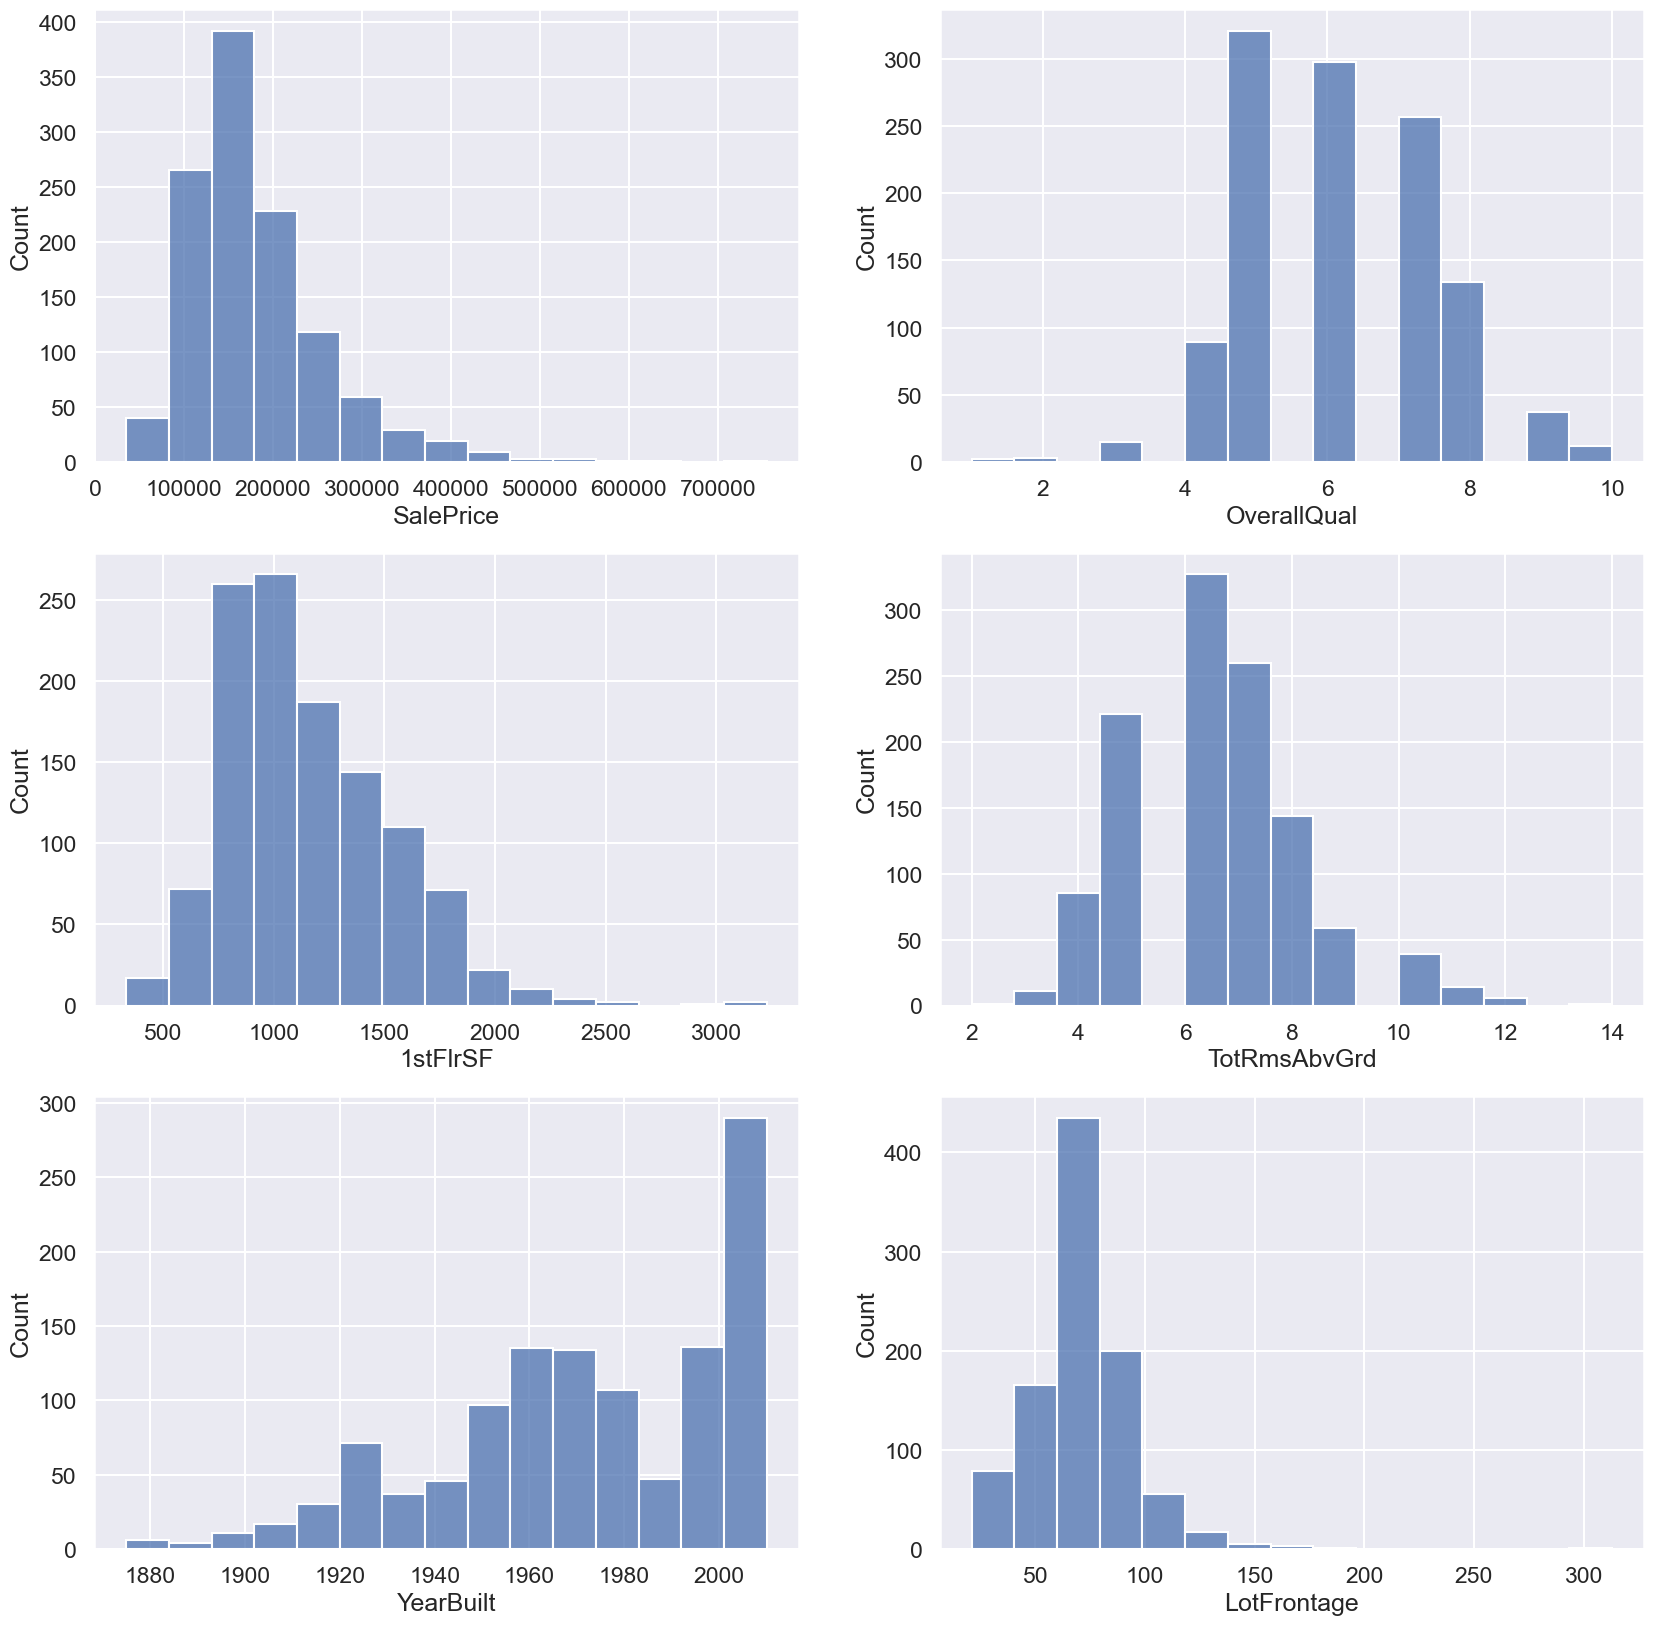

In [203]:
# Utilizamos Seaborn para realizar el histograma por cada variable del set de entrenamiento
pd.options.mode.use_inf_as_na = True
fig, axes = plt.subplots(figsize=(20,20), nrows=3, ncols=2)

for i in range(set_entrenamiento.shape[1]):
    sns.histplot(set_entrenamiento.iloc[:,i], kde=False, bins=15, ax=axes[i//2, i%2])
    sns.set_context('talk')
plt.show

In [21]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Proyecto1_RegresionLineal.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	Data fields.txt
	proyecto_training_data.npy

no changes added to commit (use "git add" and/or "git commit -a")


In [22]:
!git add Proyecto1_RegresionLineal.ipynb

The file will have its original line endings in your working directory


In [23]:
!git commit -m "Se trabajo en los sets de entrenamiento, análisis exploratorio y en la creación de histogramas para cada variable"

[main 54077a8] Se trabajo en los sets de entrenamiento, anÃ¡lisis exploratorio y en la creaciÃ³n de histogramas para cada variable
 1 file changed, 356 insertions(+), 10 deletions(-)


In [24]:
!git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.


To https://github.com/CarlosRisch/ProyectoRegresion.git
   97a9e48..54077a8  main -> main


## 5. Para cada variable independiente x :
#### Calcular el coeficiente de correlacion entre x y y.
#### Graficar x vs y(scatterplot) usando matplotlib.
#### Colocar el coeficiente de correlaci´on y colocarlo como parte del titulo de la grafica.
#### Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables
#### con mas potencial predictivo es decir las 2 variables que presentan mayor correlacion
#### entre dicha variable y la variable dependiente.

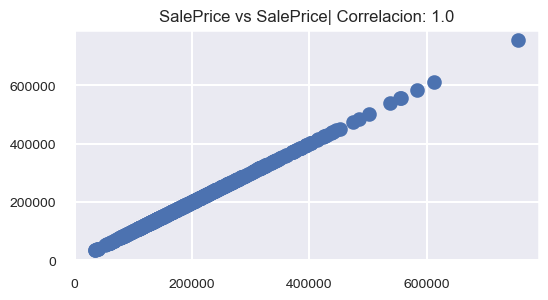

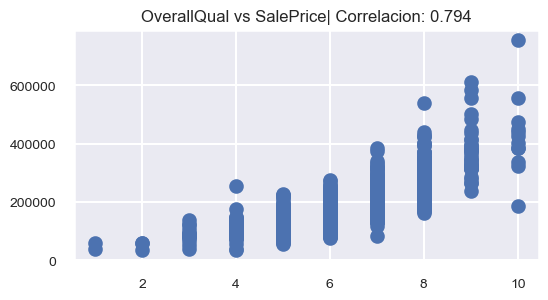

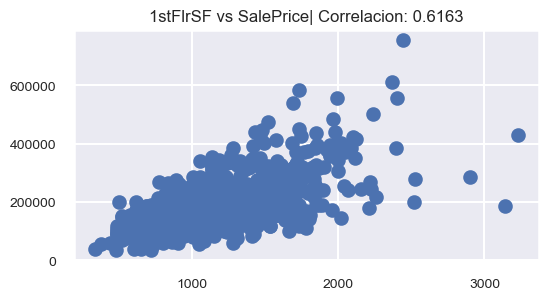

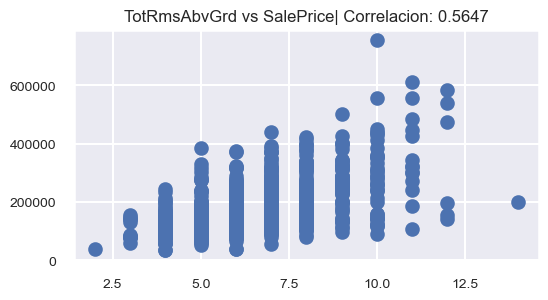

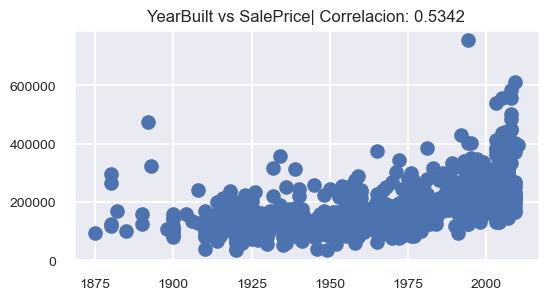

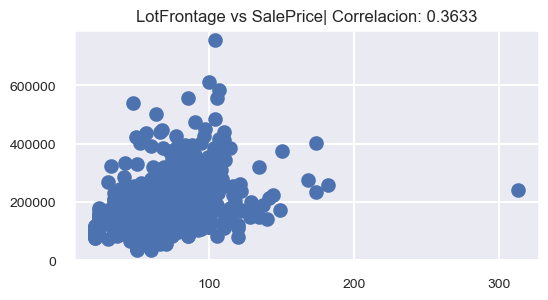

In [204]:
# Vamos a crear una función para cálcular el coeficiente de correlación entre X y Y
def coef_correlacion_xy(datos, x, y):
    correlacion = pd.DataFrame(datos[[x, y]]).corr().iloc[0, 1]
    plt.figure(figsize = (6,3))
    plt.scatter(data = datos, x = x, y = y)
    plt.title(str(x) + ' vs ' + str(y) + '| Correlacion: ' + str((round(correlacion, 4))), fontsize = 12)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.show()
    return round(correlacion, 4)

# creamos una lista para las variables y las correlaciones
variables = []
correlaciones = []

for i in df_datos.columns.to_list():
    variables.append(i)
    correlaciones.append(coef_correlacion_xy(set_entrenamiento, i, 'SalePrice'))

In [205]:
# Para determinar cuales son las variables con mayor prediccion, vamos a realizar un ordenamiento de mayor a menor
df_valores = pd.DataFrame({'Variables': variables, 'Correlaciones': correlaciones})
df_valores.sort_values(by='Correlaciones', ascending = False)

,Variables,Correlaciones
0,SalePrice,1.0000
1,OverallQual,0.7940
2,1stFlrSF,0.6163
3,TotRmsAbvGrd,0.5647
4,YearBuilt,0.5342
5,LotFrontage,0.3633


In [206]:
# Segun datos de la grafica y los resultados obtenidos, se determina que OveraLLQual como variable independiente x1 y SalePrice como variable dependiente
Var_x = set_entrenamiento.loc[:, ['OverallQual']]
Var_x.head()

,OverallQual
0,7.0
1,6.0
2,7.0
3,7.0
4,8.0


In [207]:
# Segun datos de la grafica y los resultados obtenidos, se determina que 1stFlrSF como variable independiente x2 y SalePrice como variable dependiente
Var_x2 = set_entrenamiento.loc[:, ['1stFlrSF']]
Var_x2.head()

,1stFlrSF
0,856.0
1,1262.0
2,920.0
3,961.0
4,1145.0


In [50]:
!git add .

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


In [51]:
!git commit -m "Se realizo algunas correciones y se agrego el coeficiente de correlacion para las variables X y Y, además se determinó las 2 variables que presentan mayor correlación"

[main dfadfc9] Se realizo algunas correciones y se agrego el coeficiente de correlacion para las variables X y Y, ademÃ¡s se determinÃ³ las 2 variables que presentan mayor correlaciÃ³n
 4 files changed, 1228 insertions(+), 749 deletions(-)
 copy Proyecto1_RegresionLineal.ipynb => .ipynb_checkpoints/Proyecto1_RegresionLineal-checkpoint.ipynb (98%)
 create mode 100644 Data fields.txt
 rewrite Proyecto1_RegresionLineal.ipynb (80%)
 create mode 100644 proyecto_training_data.npy


In [52]:
!git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.


To https://github.com/CarlosRisch/ProyectoRegresion.git
   54077a8..dfadfc9  main -> main


In [208]:
# Vamos a crear 3 arrays que contengan los datos para OverallQual, 1stFlrSF y SalePrice
set_OverallQual = np.array(set_entrenamiento['OverallQual']) 
set_1stFlrSF = np.array(set_entrenamiento['1stFlrSF'])
set_SalePrice = np.array(set_entrenamiento['SalePrice'])

In [209]:
print(set_OverallQual)
print(set_1stFlrSF)
print(set_SalePrice)

[7. 6. 7. ... 7. 8. 6.]
[ 856. 1262.  920. ... 1502. 1694.  959.]
[208500. 181500. 223500. ... 233170. 245350. 173000.]


## 6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗x.
#### La funcion recibe como argumentos:
#### 6.1 Vector con la variable independiente x,
#### 6.2 Vector con la variable dependiente y,
#### 6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
#### 6.4 un entero imprimir_error_cada , que nos indica cada cuantas iteraciones queremos imprimir a traves de print: el numero de iteracion, el error del modelo en esa iteracion, si imprimir error cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.
#### 6.5 escalar α(learning rate): es usado como parte de la expresion matematica para actualizar en cada iteracion los parametros del modelo.

In [238]:
# Creamos una clase que contendra los diferentes metodos para realizar la regresión lineal uni-variable
class entrenar_regresion_lineal:
    def __init__(self, x, y, epochs = 1000, imprimir_error_cada = 100, learning_rate = 0.001):
        self.x = x
        self.y = y
        self.epochs = epochs
        self.imprimir_error_cada = imprimir_error_cada
        self.learning_rate = learning_rate
        self.betas = np.array([[1],[1]])
        self.x1 = np.hstack([x.reshape(-1, 1), np.ones_like(x).reshape(-1, 1)])
        self.all_errores = {}
        self.all_betas = {}
# metodo que recorrera por la cantidad de epochs y entrenará el modelo
    def r_epochs(self):
        n = len(self.x1)
        for i in range(1, self.epochs + 1):
            self.pre_y = np.dot(self.x1, self.betas) # Vectorizamos, obteniendo el vector pre_y
            errores = (1/(2*n))*((self.y - self.pre_y)**2).sum() #(1/(2*n)) * ((self.y - self.pre_y)**2).sum()
            if i % self.imprimir_error_cada == 0:
                print(f'Iteración: {i}, Error: {errores}')
            self.all_errores[i] = errores
            self.g = ((1/n) * np.dot((self.pre_y - self.y).reshape(1,-1), self.x1)).reshape(-1,1)
            self.betas = np.dot(np.hstack([self.betas, self.g]), np.array([[1], [-self.learning_rate]]))
            self.all_betas[i] = self.betas
        print(f'betas: {self.all_betas}, Errores: {self.all_errores}')
        self.imprime_errores()
        return self.pre_y
# Función que imprime los errores encontrados
    def imprime_errores(self):
        plt.plot(np.arange(1, self.epochs + 1), self.all_errores.values(), color='r')
        plt.title('Errores en el Tiempo')
        plt.xlabel('X epochs')
        plt.ylabel('Error')
        plt.show()
# metodo que muestra como funciona el modelo a través del tiempo
    def imprime_modelo(self, iteraciones):
        plt.scatter(self.x, self.y, s=10, alpha=0.5)
        for i in range(1, self.epochs + 1):
            if i % iteraciones == 0:
                aux_y = np.dot(self.x1, self.all_betas[i])
                if i == self.epochs:
                    plt.plot(self.x, aux_y, c='purple')
                else:
                    plt.plot(self.x, aux_y, alpha=0.2, c='purple')
        plt.title('Modelo en el tiempo')
        plt.show()
# metodo que entrenara cada x con sklearn
    def regresion_con_sklearn(self):
        regresion = LinearRegression().fit(self.x, self.y)
        self.pre_y_sk = regresion.predict(self.x)
        print(f'B0: {regresion.intercept_} \n B1: {regresion.coef_}')

        plt.scatter(self.x, self.y, s=10, alpha=0.5)
        plt.plot(self.x, self.pre_y_sk, color='r')
        plt.title('Modelo de SKlearn')
        plt.show()

        return self.pre_y_sk
# metodo de estimación del modelo manual y de SKlearn
    def estimacion_modelos(self, manual, sk, vector):
        auxiliar_manual = manual[:,0]
        auxiliar_sk = sk[:,0]
        vector = vector + np.nanmean(np.array([auxiliar_manual[0:len(vector),], auxiliar_sk[0:len(vector),]]), axis=0).reshape(-1,1)
        
        return np.array([auxiliar_manual[0:len(vector),], auxiliar_sk[0:len(vector),], vector[:,0]])
# metodo que maneja los datos de prueba para cada uno de los modelos
    def test_datos(self, x, y):
        manual_y = self.regresion_manual(x, y)
        sklearn_y = self.regresion_sklearn(x, y)

        r_manual = mean_squared_error(y, manual_y)
        r_sklearn = mean_squared_error(y, sklearn_y)

        self.imprime_errores2(r_manual, r_sklearn)
# Metodo que obtiene los datos predictivos del modelo manual
    def regresion_manual(self, x, y):
        x1 = np.hstack([x.reshape(-1, 1), np.ones_like(x).reshape(-1, 1)])
        pre_y = np.dot(x1, self.betas)
        return pre_y
# Metodo que obtiene los datos predictivos del modelo SKlearn
    def regresion_sklearn(self, x, y):
        reg = LinearRegression().fit(x, y)
        sk_y = reg.predict(x)
        return sk_y
# Metodo que imprime los errores de ambos modelos
    def imprime_errores2(self, error_m, error_sk):
        x_axis = np.arange(1)
        plt.bar(['Regresion Manual'], error_m, width=0.45, edgecolor='k', color='g', label='Manual')
        plt.bar(['Regresion Sklearn'], error_sk, width=0.45, edgecolor='k', color='y', label='Sklearn')
        plt.legend(loc=1)
        plt.title('Comparación de Errores')
        plt.show()


In [239]:
mi_modelo = entrenar_regresion_lineal(Var_x.to_numpy(), set_entrenamiento.loc[:, ['SalePrice']].to_numpy())

Iteración: 100, Error: 1397939638.7650905
Iteración: 200, Error: 1390146579.296703
Iteración: 300, Error: 1387852611.8858814
Iteración: 400, Error: 1385581786.1415613
Iteración: 500, Error: 1383332363.354582
Iteración: 600, Error: 1381104141.3758008
Iteración: 700, Error: 1378896920.3874977
Iteración: 800, Error: 1376710502.4553528
Iteración: 900, Error: 1374544691.5105767
Iteración: 1000, Error: 1372399293.33233
betas: {1: array([[1188.90245291],
       [ 181.58317637]]), 2: array([[2329.23258168],
       [ 354.73834415]]), 3: array([[3423.89672761],
       [ 520.76317141]]), 4: array([[4474.72484007],
       [ 679.9433979 ]]), 5: array([[5483.47353781],
       [ 832.55331305]]), 6: array([[6451.8290474 ],
       [ 978.85621485]]), 7: array([[7381.41002409],
       [1119.10485025]]), 8: array([[8273.77025955],
       [1253.54183801]]), 9: array([[9130.4012811 ],
       [1382.40007454]]), 10: array([[9952.73484679],
       [1505.9031235 ]]), 11: array([[10742.14534056],
       [ 1624.2

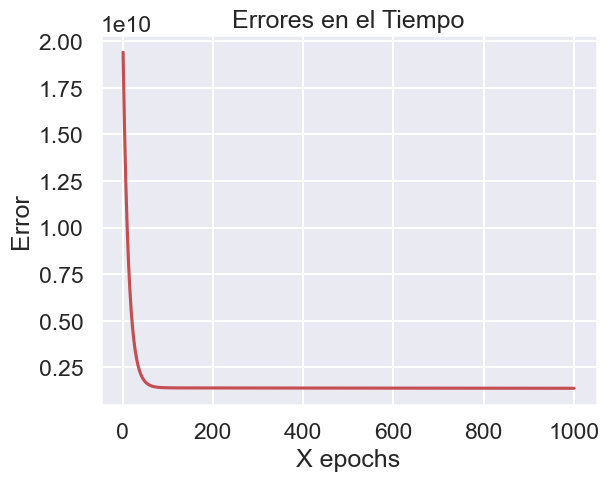

In [240]:
iteraciones_betas= mi_modelo.r_epochs()

In [175]:
!git add Proyecto1_RegresionLineal.ipynb

The file will have its original line endings in your working directory


In [176]:
!git commit -m "Se agrego una clase para manejar los diferentes metodos que tendra el modelo de regresion lineal, tambien el metodo r_epochs e imprimir error "

[main 225c517] Se agrego una clase para manejar los diferentes metodos que tendra el modelo de regresion lineal, tambien el metodo r_epochs e imprimir error
 1 file changed, 1310 insertions(+), 20 deletions(-)


In [177]:
!git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.


To https://github.com/CarlosRisch/ProyectoRegresion.git
   dfadfc9..225c517  main -> main


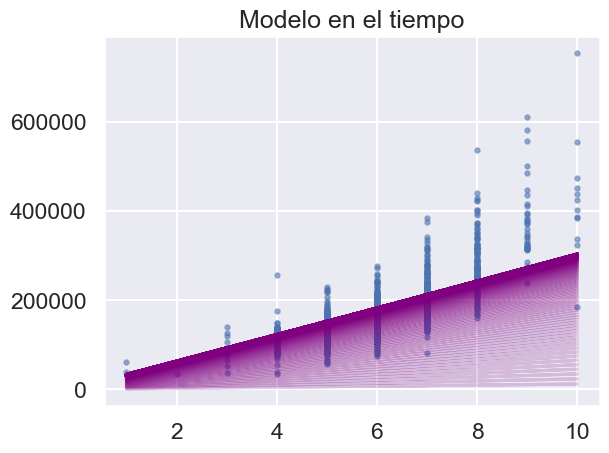

In [241]:
mi_modelo.imprime_modelo(1)

B0: [-96469.57131874] 
 B1: [[45411.99877916]]


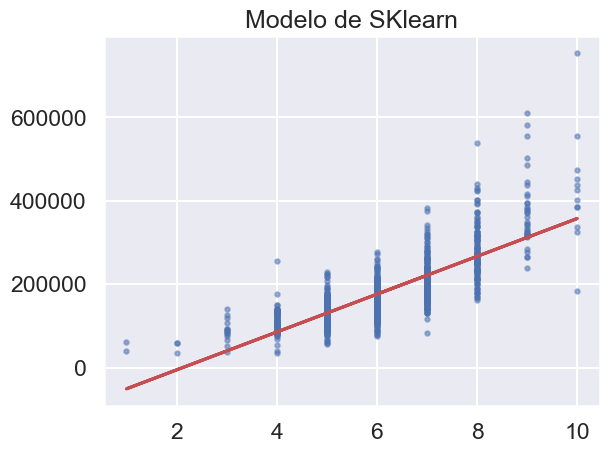

In [242]:
_sklearn_ = mi_modelo.regresion_con_sklearn()

## Comparativa contra la variable X1

In [243]:
res = mi_modelo.estimacion_modelos(iteraciones_betas, _sklearn_,  np.zeros_like(np.arange(10), dtype=int).reshape(-1,1))
df = pd.DataFrame({'Predicción Manual': res[0], 'Predicción Sklearn': res[1], 'Promedio': res[2]})
df.index += 1
df

,Predicción Manual,Predicción Sklearn,Promedio
1,212444.521244,221414.420135,216929.470690
2,182089.049378,176002.421356,179045.735367
3,212444.521244,221414.420135,216929.470690
4,212444.521244,221414.420135,216929.470690
5,242799.993110,266826.418915,254813.206012
6,151733.577513,130590.422577,141162.000045
7,242799.993110,266826.418915,254813.206012
8,212444.521244,221414.420135,216929.470690
9,212444.521244,221414.420135,216929.470690
10,151733.577513,130590.422577,141162.000045


## Validación con el Set de Pruebas

In [ ]:
mi_modelo.data_test(set_pruebas.loc[:, ['OverallQual']].to_numpy(),set_pruebas.loc[:, ['SalePrice']].to_numpy())